In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
#import Dataset
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
'''EDA & Data Visualization'''

'EDA & Data Visualization'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
'''Renaming Columns'''
df = df.rename({'Delivery Time':'dt', 'Sorting Time':'st'},axis=1)
df.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
df.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


C:\Users\omkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dt', ylabel='Density'>

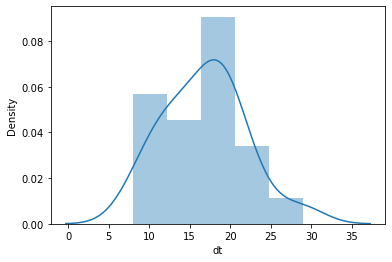

In [7]:
sb.distplot(df['dt'])

C:\Users\omkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='st', ylabel='Density'>

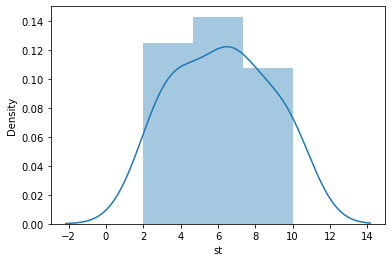

In [8]:
sb.distplot(df['st'])

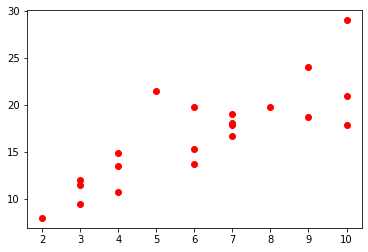

In [9]:
plt.scatter(x= df.st, y=df.dt, color= 'RED' )

<AxesSubplot:xlabel='st', ylabel='dt'>

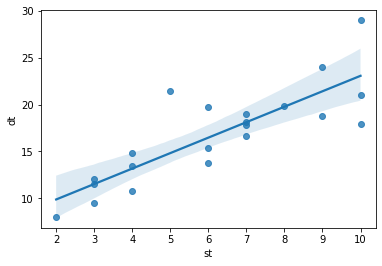

In [10]:
sb.regplot(x = df['st'], y = df['dt'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23a6bfca040>,
 'caps': [<matplotlib.lines.Line2D at 0x23a6bfca5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a6bfb9df0>],
 'medians': [<matplotlib.lines.Line2D at 0x23a6bfcab50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a6bfcae20>],
 'means': []}

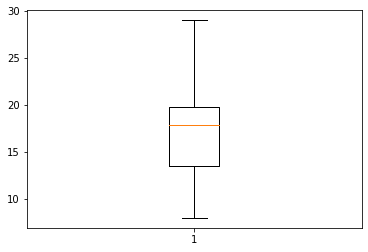

In [11]:
plt.boxplot(df.dt)

{'whiskers': [<matplotlib.lines.Line2D at 0x23a6c020eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x23a6c030490>,
 'boxes': [<matplotlib.lines.Line2D at 0x23a6c020bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x23a6c030a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x23a6c030c70>],
 'means': []}

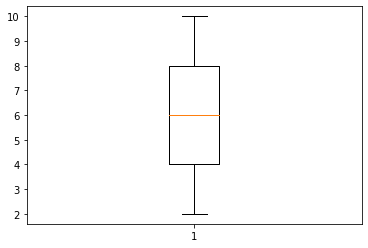

In [12]:
plt.boxplot(df.st)

(array([3., 5., 5., 6., 1., 1.]),
 array([ 8. , 11.5, 15. , 18.5, 22. , 25.5, 29. ]),
 <BarContainer object of 6 artists>)

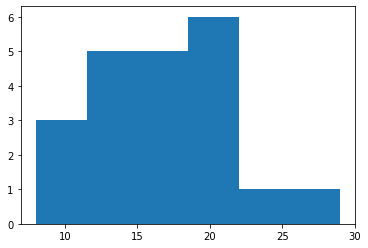

In [13]:
plt.hist(df.dt, bins=6)

(array([4., 3., 1., 7., 1., 5.]),
 array([ 2.        ,  3.33333333,  4.66666667,  6.        ,  7.33333333,
         8.66666667, 10.        ]),
 <BarContainer object of 6 artists>)

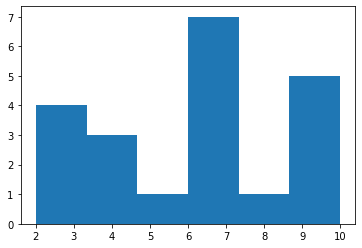

In [14]:
plt.hist(df.st, bins=6)

In [15]:
'''Model Building'''

'Model Building'

In [17]:
model= smf.ols("dt ~ st",data=df).fit()

In [18]:
'''Model Testing'''

'Model Testing'

In [19]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [21]:
model.tvalues, model.pvalues

(Intercept    3.823349
 st           6.387447
 dtype: float64,
 Intercept    0.001147
 st           0.000004
 dtype: float64)

In [22]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [24]:
'''Model Predictions For Sorting Time 3'''

'Model Predictions For Sorting Time 3'

In [26]:
dt = (6.582734) + (1.649020)*(3)
dt

11.529793999999999

In [29]:
#Automatic Prediction for Sorting Time 3 and 8
new_df = pd.Series([3,8])
new_df

0    3
1    8
dtype: int64

In [30]:
df_pred = pd.DataFrame(new_df, columns=['st'])
df_pred

,st
0,3
1,8


In [31]:
model.predict(df_pred)

0    11.529794
1    19.774893
dtype: float64